# **Foundations Data Project**

*Use Python and Python libraries to pre-process and analyse data.*

---

## Task 1

*Load the CSV dataset into Python, print the first ten records and write a short descriptive paragraph of the dataset.*

### Task 1 Summary

*Write a short descriptive paragraph of the dataset.*

The dataset contains records of purchase orders including product ID and categories, shipping information, regional data, and sales/profit data. The dates are recorded as objects rather than datetime values and do not appear to be in a consistent format. An approach applying the 'most likely' correct format conversion would give reliable shipping interval data. The product ID and categories corroborate each other so where missing values exist they can be used to fill in gaps. Looking at unique values in string data identifies straightforward cleaning needs such as the region value, and where the data needs converting such as the quantity value(1).

### Setting up the dataframe

*Load the provided CSV dataset into Python and print the first ten records with the associated column names.*

In [11]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
import re

In [12]:
# I am commenting this instruction out for the pdf file but for my reference this instruction justs checks to see if the necessary libraries are in place
#!pip list

In [13]:
# importing the sample data set
# and saving the resulting dataframe into a variable df
df = pd.read_csv('sample-superstore.csv')

In [14]:
# printing the first 10 records with the associated column headings
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7773,CA-2016-108196,25/11/2016,12/02/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,Est,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978
1,684,US-2017-168116,11/04/2017,11/04/2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,"""27217""",South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
2,9775,CA-2014-169019,26/07/2014,30/07/2014,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3,3012,CA-2017-134845,17/04/2017,24/04/2017,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.98
4,4992,US-2017-122714,12/07/2017,13/12/2017,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
5,3152,CA-2015-147830,15/12/2015,18/12/2015,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,...,43055,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,Two,0.7,"""-2639.9912"""
6,5311,CA-2017-131254,19/11/2017,21/11/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7,9640,CA-2015-116638,28/01/2015,NaN,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,28027,South,FUR-TA-10000198,Frnture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,Thirteen,0.4,NaN
8,1200,CA-2016-130946,04/08/2016,04/12/2016,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77041,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9,2698,CA-2014-145317,18/03/2014,23/03/2014,Standard Class,SM-20320,Sean Miller,Home Office,NaN,Jacksonville,...,32216,Southh,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784


### Inspecting the dataframe

### Functions used within the Dataframe inspection

In [17]:
#Looking at the non-null entries in relevant columns using the column index and a user defined function

def find_null_values_by_column(index):
    # Get the list of column names
    column_names = df.columns
    
    # Ensure the index is within range
    if index >= len(column_names) or index < 0:
        return "Index is out of range."

    # Get the column name using the index
    column_name = column_names[index]

    # Find rows where values in the selected column are null
    return df[df[column_name].isna()]

In [18]:
#Function to search for and display specific records

def search_value(column_name, value):
    """
    Looks for a specific value in a column.

    Args:
      column_name: The name of the column you are looking in.
      value: The value you are looking for

    Returns:
      The dataframe entries of that value.
      NB - this may be a large number of entries.
    """
    try:
        row_index = df[df[column_name] == value].index
        if len(row_index) == 0:
            return 'No entry found'
        return df.iloc[row_index]
    except (KeyError):
        return f"Column '{column_name}' does not exist in the DataFrame."
    except Exception as e:
        return f"An error occurred: {e}"

### Tasks completed to understand the dataset

In [20]:
#running the info method on the dataframe to get the key charactersitics
#this gives me a detailed breakdown of the dataset in order to work out what information I have, 
#what format it is in and what I will need to do to clean the data prior to use 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9993 non-null   object 
 2   Order Date     9992 non-null   object 
 3   Ship Date      9991 non-null   object 
 4   Ship Mode      9990 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9991 non-null   object 
 7   Segment        9991 non-null   object 
 8   Country        9990 non-null   object 
 9   City           9992 non-null   object 
 10  State          9990 non-null   object 
 11  Postal Code    9991 non-null   object 
 12  Region         9991 non-null   object 
 13  Product ID     9992 non-null   object 
 14  Category       9992 non-null   object 
 15  Sub-Category   9990 non-null   object 
 16  Product Name   9991 non-null   object 
 17  Sales          9993 non-null   float64
 18  Quantity

In [21]:
# Converting the column titles into more Python friendly format
df.columns = df.columns.str.replace(' ','_').str.replace('-','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9993 non-null   object 
 2   Order_Date     9992 non-null   object 
 3   Ship_Date      9991 non-null   object 
 4   Ship_Mode      9990 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9991 non-null   object 
 7   Segment        9991 non-null   object 
 8   Country        9990 non-null   object 
 9   City           9992 non-null   object 
 10  State          9990 non-null   object 
 11  Postal_Code    9991 non-null   object 
 12  Region         9991 non-null   object 
 13  Product_ID     9992 non-null   object 
 14  Category       9992 non-null   object 
 15  Sub_Category   9990 non-null   object 
 16  Product_Name   9991 non-null   object 
 17  Sales          9993 non-null   float64
 18  Quantity

In [22]:
#Looking at the non-null entries in relevant columns using the column index and a user defined function

find_null_values_by_column(1)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
202,5187,NaN,27/11/2015,12/03/2015,Standard Class,EH-14125,Eugene Hildebrand,Home Office,United States,Philadelphia,...,19140,East,TEC-PH-10002789,Technology,Phones,LG Exalt,748.752,8,0.4,-162.2296


In [23]:
find_null_values_by_column(15)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
11,3325,CA-2014-165309,11/11/2014,15/11/2014,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Houston,...,77095,Central,OFF-BI-10001359,Office Supplies,NaN,GBC DocuBind TL300 Electric Binding System,896.990,5,0.8,-1480.0335
106,2592,US-2016-115455,09/08/2016,14/09/2016,Standard Class,SE-20110,Sanjit Engle,Consumer,United States,Wheeling,...,60090,Central,FUR-TA-10003569,Furniture,NaN,Bretford CR8500 Series Meeting Room Furniture,601.470,3,0.5,-300.735
124,8943,CA-2016-159023,11/03/2016,11/05/2016,First Class,NW-18400,Natalie Webber,Consumer,United States,Portland,...,97206,West,TEC-MA-10003337,Technology,NaN,Okidata B401 Printer,179.991,3,0.7,-251.9874
442,741,CA-2014-112326,01/04/2014,01/08/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,NaN,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748


In [24]:
find_null_values_by_column(20)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
7,9640,CA-2015-116638,28/01/2015,NaN,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,28027,South,FUR-TA-10000198,Frnture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.6440,Thirteen,0.40,NaN
14,7899,CA-2017-128363,13/08/2017,18/08/2017,Standard Class,DC-12850,Dan Campbell,Consumer,US,Memphis,...,38109,South,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1614.5820,6,0.70,NaN
62,5056,CA-2015-141243,01/03/2015,01/08/2015,Second Class,AH-10465,Amy Hunt,Consumer,United States,Dallas,...,75217,Central,FUR-BO-10003272,Furniture,Bookcases,O'Sullivan Living Dimensions 5-Shelf Bookcases,1352.3976,9,0.32,NaN
360,546,CA-2014-103849,05/11/2014,16/05/2014,Standard Class,PG-18895,Paul Gonzalez,Consumer,US,Fort Worth,...,76106,Cntral,FUR-FU-10000723,Furniture,Furnishings,"Deflect-o EconoMat Studded, No Bevel Mat for L...",66.1120,4,0.60,NaN
447,7594,CA-2016-158778,09/05/2016,09/09/2016,Standard Class,DB-13210,Dean Braden,Consumer,United States,Philadelphia,...,19134,East,FUR-CH-10000309,Furniture,Chairs,Global Comet Stacking Arm Chair,887.2710,3,0.30,NaN
501,5248,US-2015-168914,21/05/2015,27/05/2015,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Frankfort,...,60423,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,20.7680,8,0.80,NaN
539,1259,US-2016-168620,24/12/2016,28/12/2016,Second Class,RB-19795,Ross Baird,Home Office,United States,Charlotte,...,28205,South,OFF-ST-10003716,Office Supplies,Storage,Tennsco Double-Tier Lockers,540.0480,3,0.20,NaN
546,39,CA-2015-117415,27/12/2015,31/12/2015,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,NaN
649,8876,US-2016-141264,13/08/2016,19/08/2016,Standard Class,CT-11995,Carol Triggs,Consumer,United States,Irving,...,75061,Central,OFF-SU-10003505,Office Supplies,Supplies,Premier Electric Letter Opener,185.3760,2,0.20,NaN
753,9316,CA-2016-161907,04/05/2016,04/09/2016,Standard Class,JH-16180,Justin Hirsh,Consumer,United States,Philadelphia,...,19140,East,TEC-PH-10000141,Technology,Phones,Clearsounds A400,118.7820,3,0.40,NaN


In [25]:
# Looking at key statistics for the data columns
df.describe()

,Row_ID,Sales,Discount
count,9994.000000,9993.000000,9991.000000
mean,4997.500000,229.863780,0.156180
std,2885.163629,623.276019,0.206399
min,1.000000,0.444000,0.000000
25%,2499.250000,17.280000,0.000000
50%,4997.500000,54.480000,0.200000
75%,7495.750000,209.940000,0.200000
max,9994.000000,22638.480000,0.800000


In [26]:
# Looking at key info for the object columns, this will give me an idea of what relevant processing and analysis to complete
df[['Ship_Mode', 'Segment', 'Country', 'State', 'Postal_Code', 'Region', 'Quantity', 'Product_Name', 'Category', 'Sub_Category']].describe()

,Ship_Mode,Segment,Country,State,Postal_Code,Region,Quantity,Product_Name,Category,Sub_Category
count,9990,9991,9990,9990,9991,9991,9989,9991,9992,9990
unique,4,4,3,49,633,8,19,1850,4,17
top,Standard Class,Consumer,United States,California,10035,West,3,Staple envelope,Office Supplies,Binders
freq,5965,5189,9985,1999,263,3202,2407,48,6024,1522


In [27]:
# Identifying unique values from some columns in order to evaluate the cleaning needs and potential analysis fields
df.Ship_Mode.unique()

array(['Standard Class', 'Same Day', 'First Class', 'Second Class', nan],
      dtype=object)

In [28]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office', '%', nan], dtype=object)

In [29]:
df.Region.unique()

array(['Est', 'South', 'Central', 'West', 'East', 'Southh', 'Centrl', nan,
       'Cntral'], dtype=object)

In [30]:
df.Quantity.unique()

array(['5', '4', '8', 'Two', '6', 'Thirteen', '7', '3', 'Seven', '9', nan,
       '12', '2', 'ten', '10', '7?', '1', '14', '13', '11'], dtype=object)

In [31]:
df.Sub_Category.unique()

array(['Machines', 'Binders', 'Tables', 'Bookcases', nan, 'Appliances',
       'Supplies', 'Chairs', 'Furnishings', 'Phones', 'Storage',
       'Accessories', 'Fasteners', 'Art', 'Envelopes', 'Labels', 'Paper',
       'Copiers'], dtype=object)

In [32]:
df.Category.unique()

array(['Technology', 'Office Supplies', 'Frnture', 'Furniture', nan],
      dtype=object)

## Task 2

*Process the dataset's variables and conduct exploratory analysis, including univariate techniques.*

### Task 2 - Summary

Basic cleaning methods such as imputation or deletion for dealing with missing values, identifying and correcting misspellings, and conversion of data types for more useful processing have been completed. With a larger number of missing values, filling in missing data with a mean, median or mode value is beneficial and comparison with similar records to give a most probable value is good. Here where there is missing data in the category fields, a look-up task processing the product ID has been completed to fill gaps. Understanding errors helps to build more robust data collection and design reusable correction methods. 

Conversions using pandas built-in functions e.g. to_numeric or to_datetime(1) allows for more appropriate operations on the data. In this case the datetime was converted using a variety of options of original format(2) which seemed to give a consistent and sensible range of shipping interval and generate an aggregation by month for later analysis. 

A significant amount of geographical data is contained within the dataframe so geospatial analysis could have been investigated. 

A variety of aggregations have been completed to further investigate the data mainly using value_counts with matplotlib as visualizer. The describe method of viewing the numerical data has been applied, where it suggests outliers they are investigated by looking at specific records or applying a winsorization technique(2) creating 'Capped' columns.  

Finally, a brief look at anomaly investigations are attempted, the z-score is used to identify those values in profit or sales that are far from the mean value, however, the distribution is not normal so this is likely not the best indicator of outliers, the interquartile range gives a significant number more outliers. An isolation forest method (3) has been trialled to view the outliers, which depend on a lack of similarity to other data patterns in the dataset.

*Summarise how different techniques have been applied, including working.*

### Basic cleaning methods

In [39]:
# identifying the missing values as a percentage of the avilable data
# these are very low percentages meaning the missing data will not impact analysis much
missing_percentage = (df.isnull().sum() / len(df))*100
print(missing_percentage.map("{:.2f}%".format))

Row_ID           0.00%
Order_ID         0.01%
Order_Date       0.02%
Ship_Date        0.03%
Ship_Mode        0.04%
Customer_ID      0.00%
Customer_Name    0.03%
Segment          0.03%
Country          0.04%
City             0.02%
State            0.04%
Postal_Code      0.03%
Region           0.03%
Product_ID       0.02%
Category         0.02%
Sub_Category     0.04%
Product_Name     0.03%
Sales            0.01%
Quantity         0.05%
Discount         0.03%
Profit           0.11%
dtype: object


In [40]:
#looking more closely at some of the odd values
        
search_value('Segment', '%')

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
43,1682,CA-2014-122882,09/07/2014,13/09/2014,Standard Class,SB-20290,Sean Braxton,%,United States,Philadelphia,...,19134,East,TEC-MA-10004679,Technology,Machines,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,399.54,4,0.7,-559.356


In [41]:
search_value('Customer_Name', 'Sean Braxton')

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
26,2629,US-2017-165344,13/11/2017,15/11/2017,First Class,SB-20290,Sean Braxton,Corporate,United States,Springfield,...,45503,Est,TEC-MA-10002210,Technology,Machines,Epson TM-T88V Direct Thermal Printer - Monochr...,652.995,7,0.7,-935.9595
43,1682,CA-2014-122882,09/07/2014,13/09/2014,Standard Class,SB-20290,Sean Braxton,%,United States,Philadelphia,...,19134,East,TEC-MA-10004679,Technology,Machines,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,399.540,4,0.7,-559.356
49,263,US-2014-106992,19/09/2014,21/09/2014,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,77036,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.982,3,0.4,-509.997
123,264,US-2014-106992,19/09/2014,21/09/2014,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,77036,Central,TEC-MA-10003353,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...,2519.958,7,0.4,-251.9958
1030,1679,CA-2014-122882,09/07/2014,13/09/2014,NaN,SB-20290,Sean Braxton,Corporate,United States,Philadelphia,...,19134,East,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",64.784,1,0.2,-14.5764
1333,2630,US-2017-165344,13/11/2017,15/11/2017,First Class,SB-20290,Sean Braxton,Corporate,United States,Springfield,...,45503,East,OFF-BI-10003196,Office Supplies,Binders,Accohide Poly Flexible Ring Binders,11.220,10,0.7,-7.48
3596,1680,CA-2014-122882,09/07/2014,13/09/2014,Standard Class,SB-20290,Sean Braxton,Corporate,United States,Philadelphia,...,19134,East,TEC-PH-10003589,Technology,Phones,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,32.382,3,0.4,4.3176
3686,3539,CA-2014-158771,05/09/2014,05/09/2014,Same Day,SB-20290,Sean Braxton,Corporate,United States,Henderson,...,42420,South,OFF-LA-10001641,Office Supplies,Labels,Avery 518,9.450,3,0.0,4.536
4952,1681,CA-2014-122882,09/07/2014,13/09/2014,Standard Class,SB-20290,Sean Braxton,Corporate,United States,Philadelphia,...,19134,East,FUR-FU-10000758,Furniture,Furnishings,DAX Natural Wood-Tone Poster Frame,42.368,2,0.2,8.4736
5128,2628,US-2017-165344,13/11/2017,15/11/2017,First Class,SB-20290,Sean Braxton,Corporate,United States,Springfield,...,45503,East,TEC-AC-10002399,Technology,Accessories,SanDisk Cruzer 32 GB USB Flash Drive,60.864,4,0.2,9.1296


In [42]:
# quick change of one variable
df.at[43, 'Segment'] = 'Corporate'

In [43]:
search_value('Segment', '%')

'No entry found'

In [44]:
search_value('Region', 'Southh') # just checking it is a typo

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
9,2698,CA-2014-145317,18/03/2014,23/03/2014,Standard Class,SM-20320,Sean Miller,Home Office,NaN,Jacksonville,...,32216,Southh,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
20,6049,CA-2015-105571,11/07/2015,11/11/2015,Standard Class,CP-12340,10,Corporate,United States,Miami,...,33142,Southh,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1345.485,5,0.7,-1031.5385
24,4129,CA-2014-127299,19/09/2014,24/09/2014,Standard Class,JL-15835,John Lee,Consumer,United States,Charlotte,...,28205,Southh,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,2624.985,3,0.5,-944.9946


In [45]:
# modifying the region typos so they are accurate

region_corrections = {
    'Est': 'East',
    'Southh': 'South',
    'Centrl': 'Central',
    'Cntral': 'Central'
}

df['Region'] = df['Region'].replace(region_corrections)

In [46]:
df.Region.unique()

array(['East', 'South', 'Central', 'West', nan], dtype=object)

In [47]:
# modifying the category typos but just as a one-off exchange rather than a dictionary

df['Category'] = df['Category'].str.replace('Frnture', 'Furniture')

In [48]:
df.Category.unique()

array(['Technology', 'Office Supplies', 'Furniture', nan], dtype=object)

In [49]:
find_null_values_by_column(14)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
485,4093,CA-2017-166576,16/05/2017,18/05/2017,First Class,JM-15865,John Murray,Consumer,United States,Akron,...,44312,East,OFF-ST-10002574,NaN,Storage,"SAFCO Commercial Wire Shelving, Black",221.024,2,0.2,-55.256
1017,7643,US-2016-157490,10/06/2016,10/07/2016,First Class,LB-16795,Laurel Beltran,Home Office,United States,Pueblo,...,81001,West,OFF-BI-10002824,NaN,Binders,Recycled Easel Ring Binders,17.904,4,0.7,-14.92


In [50]:
# isolating the Product ID first 3 letters, adding them to a new column, then using a dictionary to look up the Category based on the code and replacing the null value with the dictionary value
# this can be easily expanded to add new Product IDs if necessary
Product_ID_Code = {
    "OFF": "Office Supplies",
    "FUR": "Furniture",
    "TEC": "Technology",
}

df.loc[df['Category'].isnull(), 'Product_Prefix'] = df.loc[df['Category'].isnull(), 'Product_ID'].astype(str).str[:3]
df.loc[df['Category'].isnull(), 'Category'] = df.loc[df['Category'].isnull(), 'Product_Prefix'].map(Product_ID_Code)

In [51]:
find_null_values_by_column(14)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Product_Prefix


In [52]:
find_null_values_by_column(15)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Product_Prefix
11,3325,CA-2014-165309,11/11/2014,15/11/2014,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Houston,...,Central,OFF-BI-10001359,Office Supplies,NaN,GBC DocuBind TL300 Electric Binding System,896.990,5,0.8,-1480.0335,NaN
106,2592,US-2016-115455,09/08/2016,14/09/2016,Standard Class,SE-20110,Sanjit Engle,Consumer,United States,Wheeling,...,Central,FUR-TA-10003569,Furniture,NaN,Bretford CR8500 Series Meeting Room Furniture,601.470,3,0.5,-300.735,NaN
124,8943,CA-2016-159023,11/03/2016,11/05/2016,First Class,NW-18400,Natalie Webber,Consumer,United States,Portland,...,West,TEC-MA-10003337,Technology,NaN,Okidata B401 Printer,179.991,3,0.7,-251.9874,NaN
442,741,CA-2014-112326,01/04/2014,01/08/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,NaN,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,NaN


In [53]:
# isolating the Product ID sub-category code, adding them to a new column, then using a dictionary to look up the Category based on the code and replacing the null value with the dictionary value
# further IDs can be added
# NB could this be developed to look for IDs where values are null?
Sub_Category_Code = {
    "ST": "Storage",
    "BI": "Binders",
    "TA": "Tables",
    "MA": "Machines",
}

df.loc[df['Sub_Category'].isnull(), 'Sub_Category_Prefix'] = df.loc[df['Sub_Category'].isnull(), 'Product_ID'].astype(str).str[4:6]
df.loc[df['Sub_Category'].isnull(), 'Sub_Category'] = df.loc[df['Sub_Category'].isnull(), 'Sub_Category_Prefix'].map(Sub_Category_Code)

In [54]:
find_null_values_by_column(15)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Product_Prefix,Sub_Category_Prefix


In [55]:
# If there were null values that weren't fixable, then removing them to avoid skewing results is an option - example
df = df.dropna(subset=['Region'])
df['Region'].unique() # shows there are no nan values

array(['East', 'South', 'Central', 'West'], dtype=object)

### Conversion methods

In [57]:
# Converting objects to numbers

# Quantity object to float64
# Profit object to float64
# Order date object to datetime
# Ship date object to datetime

In [58]:
# dictionary used as reference to convert descriptive numbers to numeric numbers
word_to_number = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
    'twelve': 12,
    'thirteen': 13,
    'fourteen': 14,
    'fifteen': 15
}

In [59]:
# Function to convert a mixed column into clean numbers

def clean_and_convert(value):
    # just in case
    value = str(value)
    
    # remove unwanted characters, keeping only digits, negative sign, and decimal point
    value = re.sub(r'[^a-zA-Z0-9\-\.]', '', value)
    
    value = value.lower()  # as the dictionary only has lower case words in
    value = word_to_number.get(value, value) 
    
    try:
        # now convert the string into a number
        return pd.to_numeric(value, errors='coerce')
    except ValueError:
        return np.nan

In [60]:
# Apply the conversion functions to the Qunatity and Profit columns
df['Quantity'] = df['Quantity'].apply(clean_and_convert)
df['Profit'] = df['Profit'].apply(clean_and_convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Row_ID               9991 non-null   int64  
 1   Order_ID             9990 non-null   object 
 2   Order_Date           9989 non-null   object 
 3   Ship_Date            9988 non-null   object 
 4   Ship_Mode            9987 non-null   object 
 5   Customer_ID          9991 non-null   object 
 6   Customer_Name        9988 non-null   object 
 7   Segment              9988 non-null   object 
 8   Country              9987 non-null   object 
 9   City                 9989 non-null   object 
 10  State                9988 non-null   object 
 11  Postal_Code          9988 non-null   object 
 12  Region               9991 non-null   object 
 13  Product_ID           9989 non-null   object 
 14  Category             9991 non-null   object 
 15  Sub_Category         9991 non-null   object

In [61]:
# to convert dates entered as objects
def valid_date(date_str):
    if pd.isna(date_str):
        return np.nan
    for fmt in ['%m/%d/%Y', '%d/%m/%Y']:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except:
            continue

    return pd.NaT

df ['Valid_Ship_Date'] = df['Ship_Date'].apply(valid_date)
df ['Valid_Order_Date'] = df['Order_Date'].apply(valid_date)

In [62]:
# create a new column conatining the number of days between ordering and shipping
df['Shipping_Interval']=(df['Valid_Ship_Date'] - df['Valid_Order_Date']).dt.days
df['Shipping_Interval'].unique()
df['Shipping_Interval'].describe() # by doing this i can see how many dates have been converted and if the shipping interval is a sensible value

count    9985.000000
mean        3.957336
std         1.747761
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping_Interval, dtype: float64

In [63]:
df['Shipping_Interval'].sample(10)

9872    4.0
560     6.0
4981    5.0
2201    2.0
5914    4.0
737     5.0
2765    5.0
7239    4.0
2372    4.0
1615    5.0
Name: Shipping_Interval, dtype: float64

In [64]:
df['Shipping_Interval'].value_counts()

Shipping_Interval
4.0    2771
5.0    2167
2.0    1334
6.0    1201
3.0    1004
7.0     620
0.0     519
1.0     369
Name: count, dtype: int64

In [65]:
# now that cleaning and converting have been done I can look at the numeric columns again
df.describe()

,Row_ID,Sales,Quantity,Discount,Profit,Valid_Ship_Date,Valid_Order_Date,Shipping_Interval
count,9991.000000,9990.000000,9986.000000,9988.000000,9980.000000,9988,9988,9985.000000
mean,4998.246322,229.675117,3.788704,0.156166,29.125362,2016-05-04 00:32:52.286744320,2016-04-30 05:16:53.536243712,3.957336
min,1.000000,0.444000,1.000000,0.000000,-6599.978000,2014-01-07 00:00:00,2014-01-03 00:00:00,0.000000
25%,2500.500000,17.256000,2.000000,0.000000,1.745450,2015-05-27 00:00:00,2015-05-23 00:00:00,3.000000
50%,4998.000000,54.432000,3.000000,0.200000,8.674400,2016-06-29 00:00:00,2016-06-26 00:00:00,4.000000
75%,7495.500000,209.937500,5.000000,0.200000,29.372000,2017-05-18 00:00:00,2017-05-14 00:00:00,5.000000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000,2018-01-05 00:00:00,2017-12-30 00:00:00,7.000000
std,2884.625181,623.129389,2.225094,0.206410,233.221284,NaN,NaN,1.747761


In [66]:
# also have a look at the object values again
df[['Ship_Mode', 'Segment', 'Country', 'State', 'Postal_Code', 'Region', 'Product_Name', 'Category', 'Sub_Category']].describe()

,Ship_Mode,Segment,Country,State,Postal_Code,Region,Product_Name,Category,Sub_Category
count,9987,9988,9987,9988,9988,9991,9988,9991,9991
unique,4,3,3,49,633,4,1850,3,17
top,Standard Class,Consumer,United States,California,10035,West,Staple envelope,Office Supplies,Binders
freq,5962,5186,9982,1999,263,3202,48,6024,1522


### Identifying Outliers

In [68]:
# this can be used to look at certain values in context to learn about the entry
min_profit = df['Profit'].idxmin()
df.iloc[min_profit]

Row_ID                                                      7773
Order_ID                                          CA-2016-108196
Order_Date                                            25/11/2016
Ship_Date                                             12/02/2016
Ship_Mode                                         Standard Class
Customer_ID                                             CS-12505
Customer_Name                                      Cindy Stewart
Segment                                                 Consumer
Country                                            United States
City                                                   Lancaster
State                                                       Ohio
Postal_Code                                                43130
Region                                                      East
Product_ID                                       TEC-MA-10000418
Category                                              Technology
Sub_Category             

In [69]:
max_sales = df['Sales'].idxmax()
df.iloc[max_sales]

Row_ID                                                              2698
Order_ID                                                  CA-2014-145317
Order_Date                                                    18/03/2014
Ship_Date                                                     23/03/2014
Ship_Mode                                                 Standard Class
Customer_ID                                                     SM-20320
Customer_Name                                                Sean Miller
Segment                                                      Home Office
Country                                                              NaN
City                                                        Jacksonville
State                                                            Florida
Postal_Code                                                        32216
Region                                                             South
Product_ID                                         

In [70]:
# detecting outliers using Z-score method (gives a measure of ow far away from the mean value it is assuming a normal distribution)
def z_score(column_name):
    """ 
    Identifies the number of outliers in the named column
    
    Args: the name of the column in the dataframe
    """
    z_score = sp.zscore(df[column_name].dropna())
    outliers_z = (abs(z_score) > 3)

    return print(f"Z-score method identified {outliers_z.sum()} outliers in {df[column_name].name}.")

In [71]:
z_score('Sales')

Z-score method identified 127 outliers in Sales.


In [72]:
z_score('Profit')

Z-score method identified 105 outliers in Profit.


In [73]:
# detecting outliers using IQR
def IQR(column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers_iqr = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound))
    print(f"IQR method identified {outliers_iqr.sum()} outliers in {df[column_name].name}.")

In [74]:
IQR('Sales')

IQR method identified 1165 outliers in Sales.


In [75]:
IQR('Profit')

IQR method identified 1872 outliers in Profit.


In [76]:
df['Sales'].describe()

count     9990.000000
mean       229.675117
std        623.129389
min          0.444000
25%         17.256000
50%         54.432000
75%        209.937500
max      22638.480000
Name: Sales, dtype: float64

In [77]:
# capping outliers
def cap_outliers(column_name, lower_percentile, upper_percentile):
    lower_limit = column_name.quantile(lower_percentile)
    upper_limit = column_name.quantile(upper_percentile)
    return column_name.clip(lower=lower_limit, upper=upper_limit)

In [78]:
# create a new column with the sales values capped 
df['Sales_Capped'] = cap_outliers(df['Sales'], 0.00, 0.95)

In [79]:
df['Sales_Capped'].describe()

count    9990.000000
mean      175.402209
std       257.537351
min         0.444000
25%        17.256000
50%        54.432000
75%       209.937500
max       956.664800
Name: Sales_Capped, dtype: float64

In [80]:
# as above but for Profits, the capping values can be easily altered when creating the visualisations
df['Profit_Capped'] = cap_outliers(df['Profit'], 0.02, 0.98)
df['Profit_Capped'].describe()

count    9980.000000
mean       25.406087
std        75.429091
min      -161.770020
25%         1.745450
50%         8.674400
75%        29.372000
max       342.829296
Name: Profit_Capped, dtype: float64

### Data Aggregations

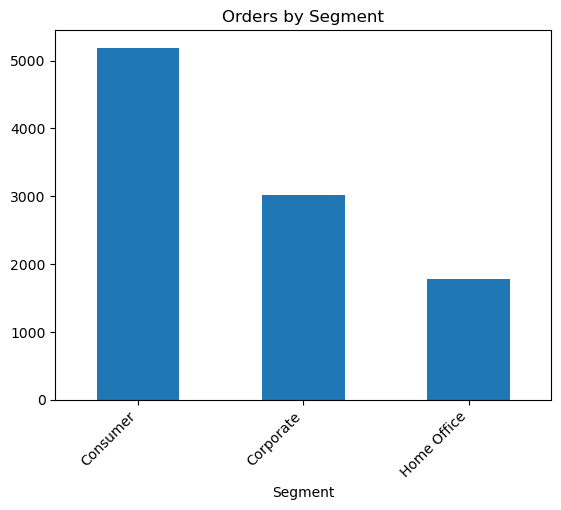

In [82]:
df['Segment'].value_counts().plot(kind='bar')
plt.title('Orders by Segment')
plt.xticks(rotation=45, ha='right')
plt.show()

In [83]:
df['Ship_Mode'].value_counts()

Ship_Mode
Standard Class    5962
Second Class      1944
First Class       1538
Same Day           543
Name: count, dtype: int64

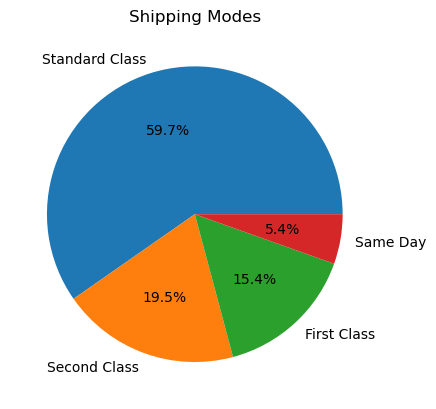

In [84]:
df['Ship_Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Shipping Modes')
plt.ylabel("")
plt.show()

In [85]:
# Looking at the orders by state, top ten values
state_counts = df['State'].value_counts()
state_counts.head(10)

State
California        1999
New York          1128
Texas              985
Pennsylvania       586
Washington         506
Illinois           492
Ohio               468
Florida            383
Michigan           255
North Carolina     249
Name: count, dtype: int64

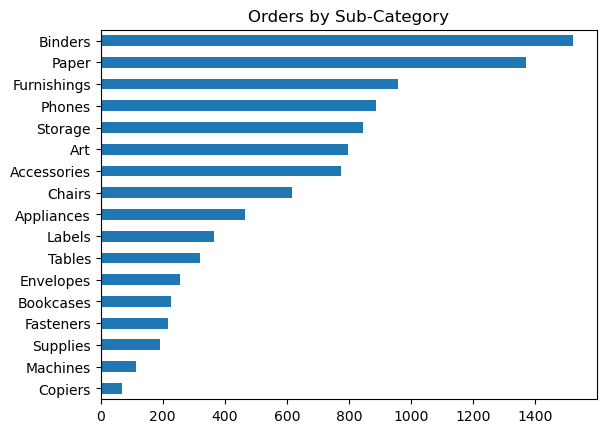

In [86]:
# barh just to show an alternative way of displaying data
sub_category_counts = df['Sub_Category'].value_counts(ascending = True)
sub_category_counts.plot(kind='barh')
plt.title('Orders by Sub-Category')
plt.ylabel('')
plt.show()

In [87]:
df['Valid_Order_Date'].dt.month.value_counts().sort_index(ascending=True)

Valid_Order_Date
1.0      381
2.0      300
3.0      696
4.0      667
5.0      734
6.0      716
7.0      709
8.0      705
9.0     1383
10.0     819
11.0    1470
12.0    1408
Name: count, dtype: int64

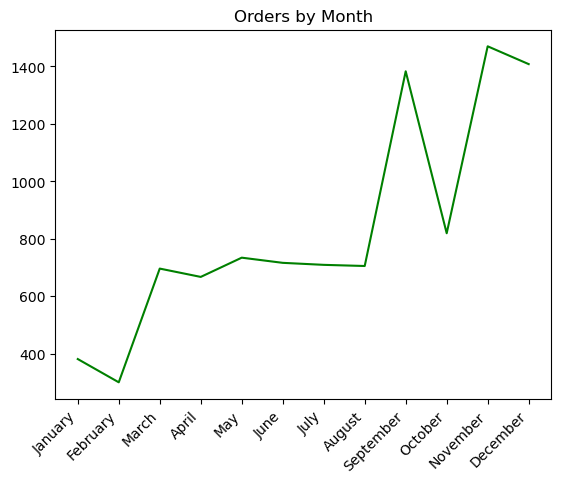

In [88]:
# This assumes the dates have been correctly converted and looks at orders by month
order_counts_by_month = df['Valid_Order_Date'].dt.month.value_counts().sort_index(ascending = True)
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.plot(month_names, order_counts_by_month.values, color='green')
plt.title('Orders by Month')
plt.xlabel('')
plt.xticks(rotation = 45, ha='right')
plt.show()

### Statistical analysis

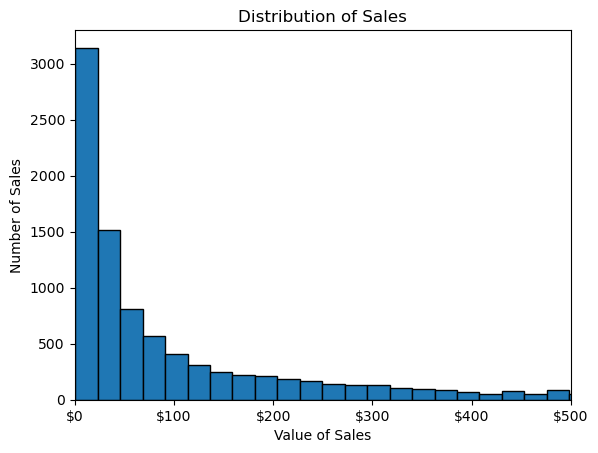

In [90]:
# This is a selection of techniques to show a number of different analyses that can be done with the dataset we have
# Looking at the number of sales in each value segment, ignoring the sales above $500 
df['Sales'].plot(kind='hist', bins=1000, edgecolor='black')
plt.xlim(0, 500)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _if:f'${int(x)}'))

plt.title('Distribution of Sales')
plt.xlabel('Value of Sales')
plt.ylabel('Number of Sales')
plt.show()

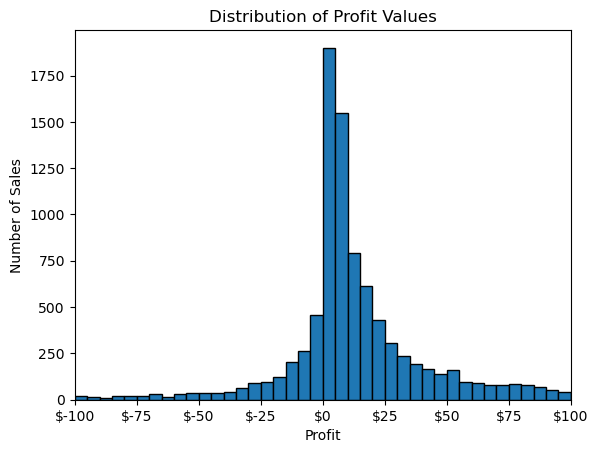

In [91]:
# Looking at the number of sales in each profit segment
df['Profit'].plot(kind = 'hist', bins = 3000, edgecolor='black')
plt.xlim(-100, 100)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))

plt.title('Distribution of Profit Values')
plt.xlabel('Profit')
plt.ylabel('Number of Sales')
plt.show()

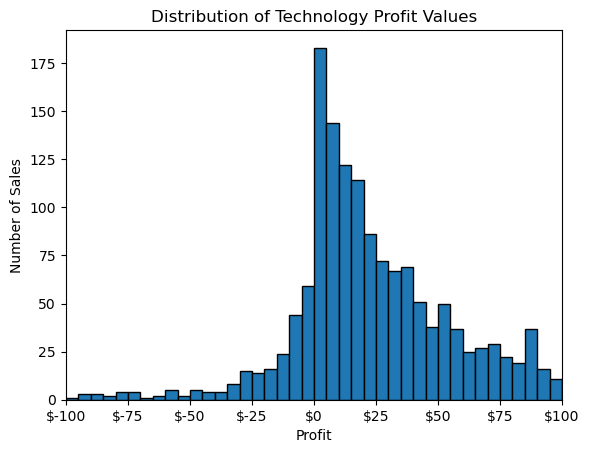

In [92]:
# selecting just one category to compare the overall profit distribution with a specific category
df_profit_category = df[(df['Category'] == 'Technology')]
df_profit_category['Profit'].plot(kind = 'hist', bins = 3000, edgecolor='black')
plt.xlim(-100, 100)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))

plt.title('Distribution of Technology Profit Values')
plt.xlabel('Profit')
plt.ylabel('Number of Sales')
plt.show()

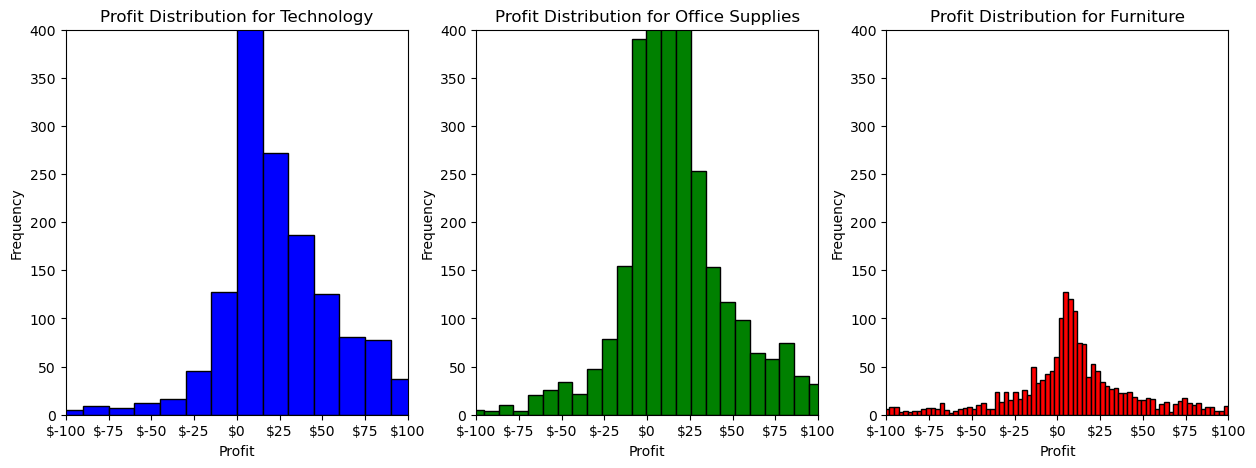

In [93]:
# this allows a comparison of the profit distributions in the three categories on the same scales
fig, axes = plt.subplots(1,3, figsize=(15, 5))

colors = ['blue', 'green', 'red']

df_cleaned = df.dropna(subset=['Category'])
categories = df_cleaned['Category'].unique()

for i, category in enumerate(categories):
    df_category = df[df['Category'] == category]
    df_category['Profit'].plot(kind='hist', bins=1000, ax=axes[i], edgecolor='black', color=colors[i])
    ax=plt.gca()
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))
    axes[i].set_title(f'Profit Distribution for {category}')
    axes[i].set_xlabel('Profit')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(-100, 100)
    axes[i].set_ylim(0, 400)

plt.tight_layout
plt.show()

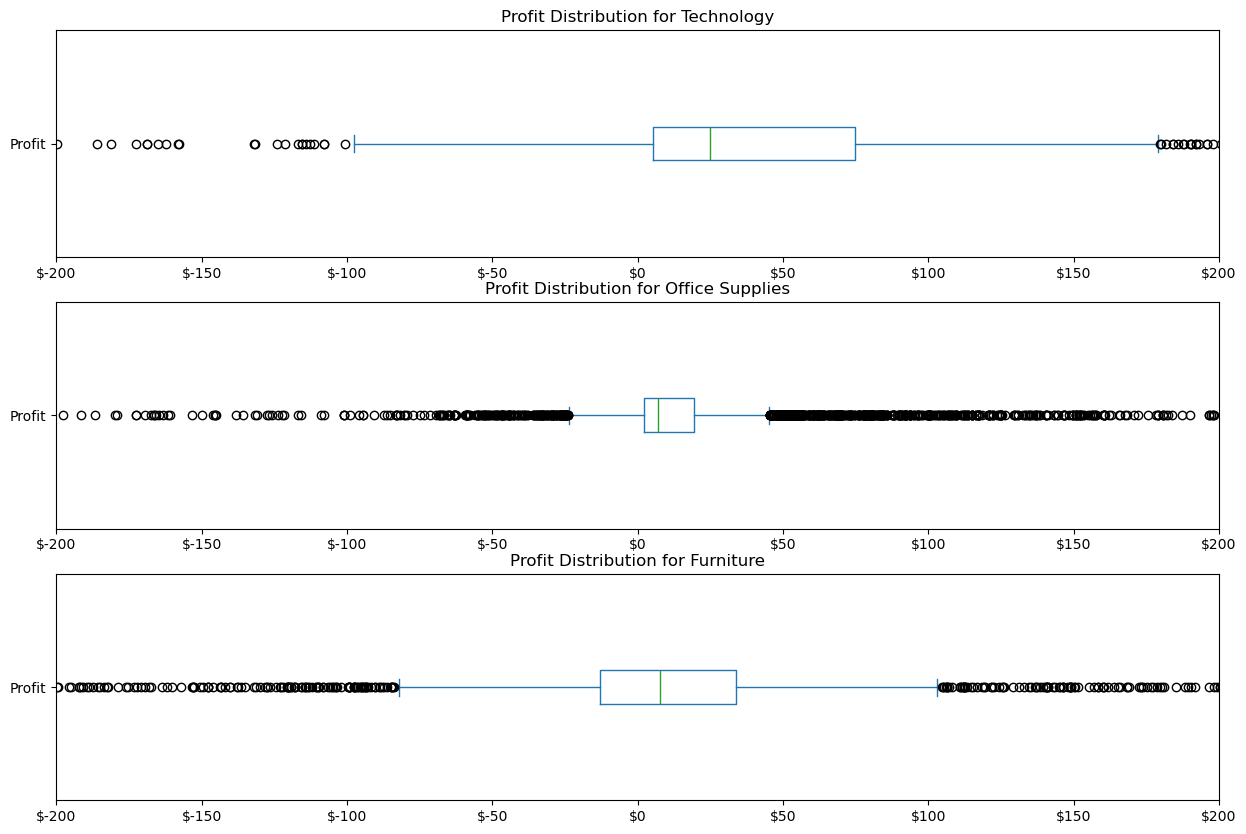

In [94]:
# Same as above but using a box and whisker plot to see the range and outliers
fig, axes = plt.subplots(3,1, figsize=(15, 10))

colors = ['blue', 'green', 'red']

df_cleaned = df.dropna(subset=['Category'])
categories = df_cleaned['Category'].unique()

for i, category in enumerate(categories):
    df_category = df[df['Category'] == category]
    df_category['Profit'].plot(kind='box', ax=axes[i], vert=False)
    ax=plt.gca()
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))
    axes[i].set_title(f'Profit Distribution for {category}')
#    axes[i].set_xlabel('Profit')
#    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(-200, 200)
#    axes[i].set_ylim(0, 400)

plt.tight_layout
plt.show()

### Anomaly Detection

In [96]:
# using an anomlay identifying method
from sklearn.ensemble import IsolationForest

In [97]:
# create a dataset with just the required data for speed
iso_trial = df[['Sales', 'Profit']].dropna()
iso_trial.describe()

,Sales,Profit
count,9979.000000,9979.000000
mean,228.963505,29.137766
std,621.824216,233.229678
min,0.444000,-6599.978000
25%,17.244000,1.746900
50%,54.336000,8.674400
75%,209.836000,29.372000
max,22638.480000,8399.976000


In [98]:
# setting the parameters to identify anomalies - these can be adjusted
n_estimators = 100
contamination = 0.05
sample_size = 256

In [99]:
iso_forest = IsolationForest(n_estimators=n_estimators,
                             contamination=contamination, 
                             max_samples=sample_size, 
                             random_state=42)
iso_forest.fit(iso_trial)

IsolationForest(contamination=0.05, max_samples=256, random_state=42)

In [100]:
# creates new column in the data with an anomaly score which can be used in further visualisations or to check that new input data is valid
data = df.loc[iso_trial.index].copy()
data['anomaly_score']= iso_forest.decision_function(iso_trial)
data['anomaly'] = iso_forest.predict(iso_trial)

data['anomaly'].value_counts()

anomaly
 1    9480
-1     499
Name: count, dtype: int64

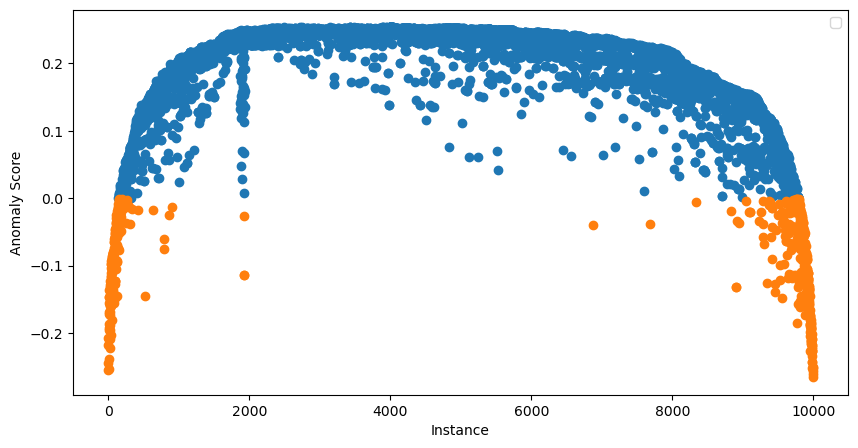

In [101]:
# by varyong the initial parameters the number of anomalies will change
plt.figure(figsize=(10,5))

normal = data[data['anomaly'] == 1]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')

plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend('')
plt.show()

## Task 3

*Python scripts to explain relationships between variables, including bivariate analysis and visualisation.*

### Task 3 - Summary

*Summarise methods.*

Seaborn is used to visualise the relationships between variables with a heatmap showing the correlations and a pair plot showing the nature of the relationships. Although there are no suprises with this data, this can be a useful exercise with more intricate datasets and highlight where further investigations are needed. 

The ease of Python code to illustrate relationships is utilised here with a wide variety of graphical representations. Bar charts have been used to show the relationship between two categories: e.g. the sales category and the segment, or the region and segment. 

An iteratvie method was used to avoid lengthy code and to display graphs side by side allowing for a comparison of profits by sub-category in the three main categories. This is also an example of understanding how a numerical variable depends on a categoric variable. 

The profit distribution by customer segment shows the value of displaying graphs together as they identify similarities in the data especially compared with how the profit distribution is markedly different for the profit by sub-category. 

The profits vs sales graphs illustrate the value of using seaborn to add another dimension to a numerical correlation in the form of identifying the segment compared with the much less informative alternative version.

### Correlations

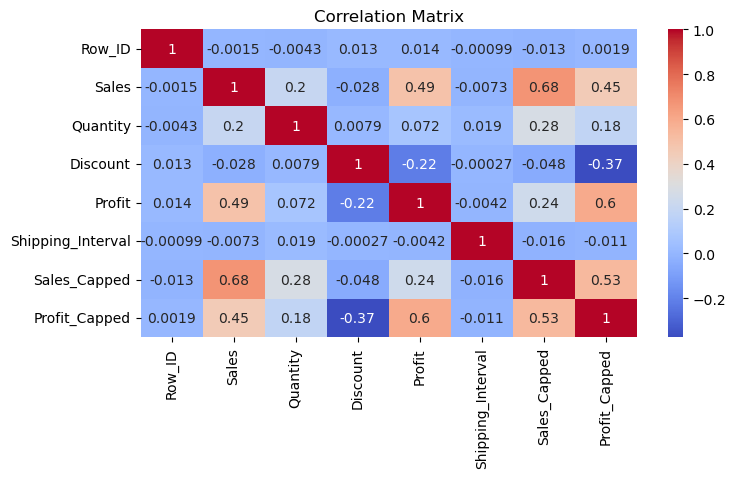

In [108]:
# Using seaborn for more statistical analysis
# looking at the numerical values only to determine if there is a correlation between any pairs
# This would likely be a more worthwhile task for different data
df_numerical = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,4))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

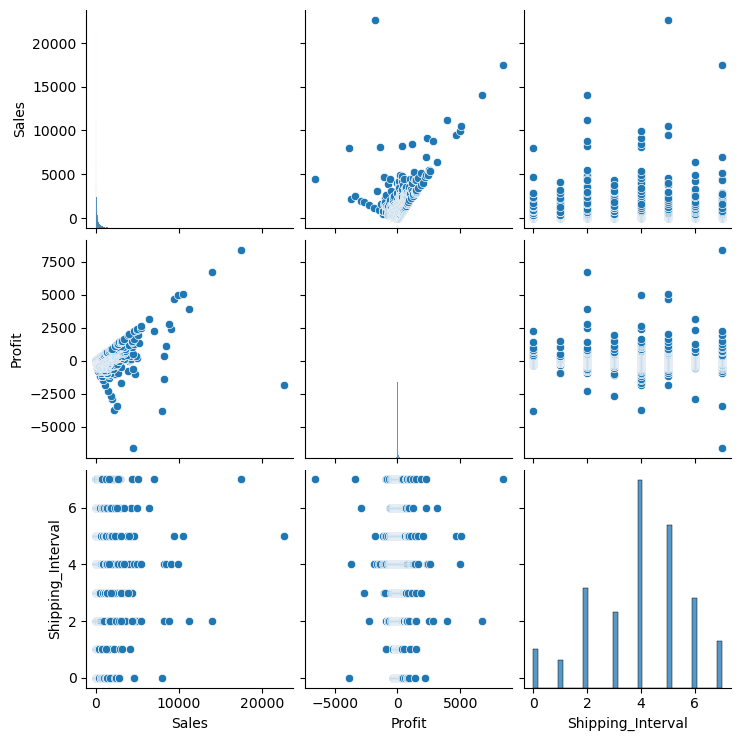

In [109]:
# this gives a quick visual on the realtionships between numerical data pairs to inform further in depth investigation
sns.pairplot(df[['Sales', 'Profit', 'Shipping_Interval']])
plt.show()

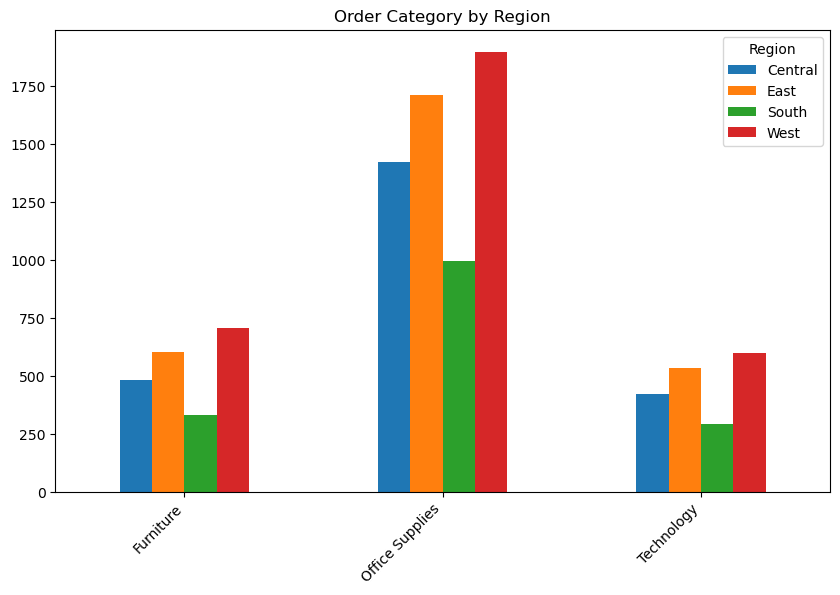

In [110]:
# some basic comparative data visualisations
categoric_comparisons = df.groupby('Category')[['Region']].value_counts().unstack(fill_value=0)
categoric_comparisons.plot(kind='bar', figsize=(10,6))
plt.title('Order Category by Region')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

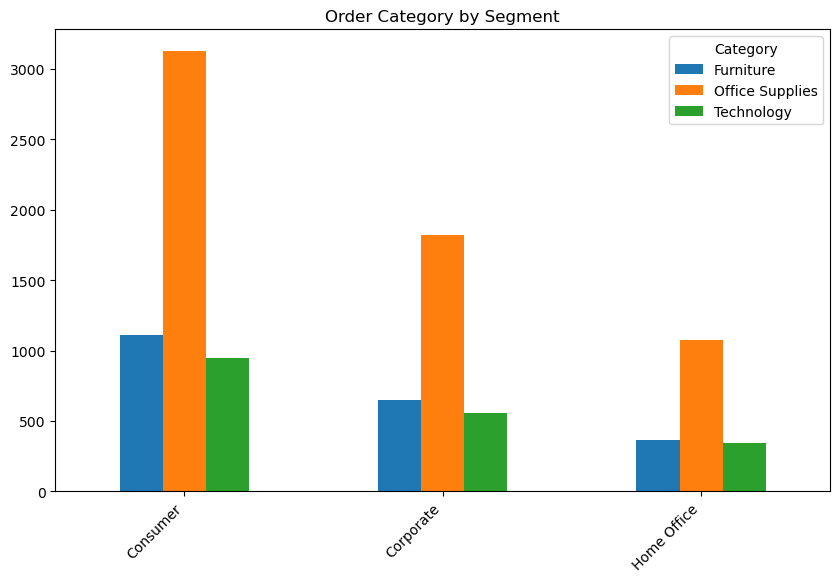

In [111]:
# as above with diff columns
categoric_comparisons = df.groupby('Segment')[['Category']].value_counts().unstack(fill_value=0)
categoric_comparisons.plot(kind='bar', figsize=(10,6))
plt.title('Order Category by Segment')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

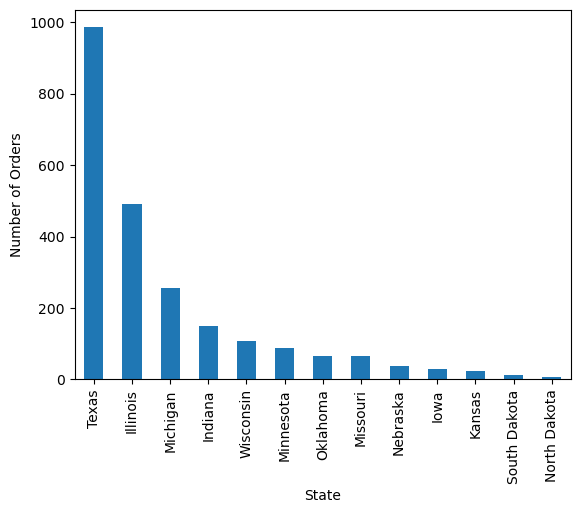

In [112]:
# selecting a subset of data to look at
df[df['Region'] == 'Central']['State'].value_counts().plot(kind='bar')
plt.ylabel('Number of Orders')
plt.show()

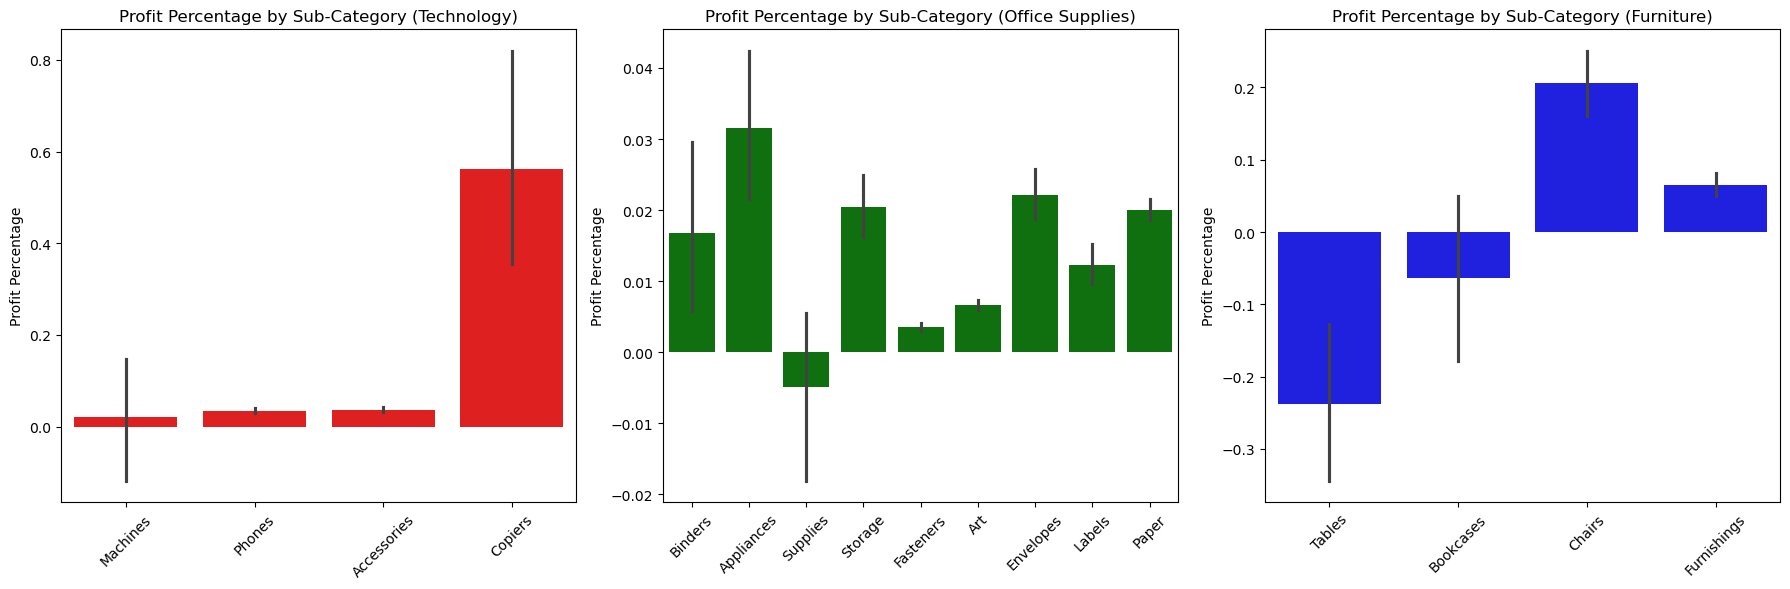

In [113]:
# iterative methods of generating graphs to compare subsets of data
pd.options.mode.copy_on_write = True #the help pages said to do this to avoid a copy warning

fig, axes = plt.subplots(1, 3, figsize=(18,6))

color=['red', 'green', 'blue']

for i, category in enumerate(df['Category'].unique()):
    df_category = df[df['Category'] == category]
    total_profit_category = df_category['Profit'].sum()

    df_category['Profit_Percentage'] = (df_category['Profit'] / total_profit_category) * 100

    sns.barplot(x='Sub_Category', y='Profit_Percentage', data = df_category, ax=axes[i], color=color[i])
    axes[i].set_title(f'Profit Percentage by Sub-Category ({category})')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Profit Percentage')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


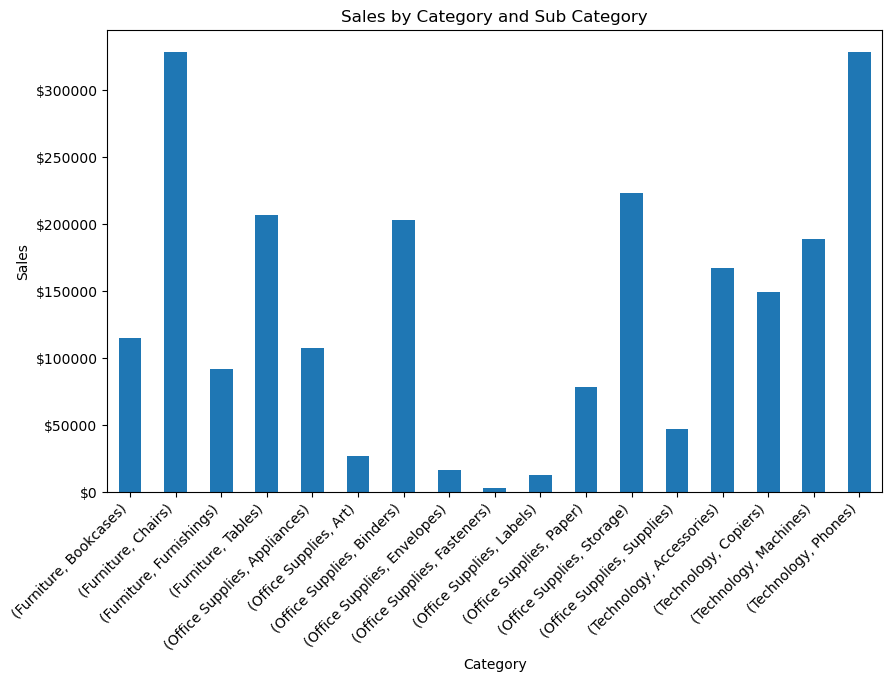

In [114]:
fig, ax = plt.subplots(figsize=(10,6))

df.groupby(['Category', 'Sub_Category'])['Sales'].sum().plot(kind='bar', stacked = False, ax=ax)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _:f'${int(y)}'))

ax.set_title('Sales by Category and Sub Category')
ax.set_xlabel('Category')
ax.set_ylabel('Sales')

plt.xticks(rotation=45, ha='right')
plt.show()

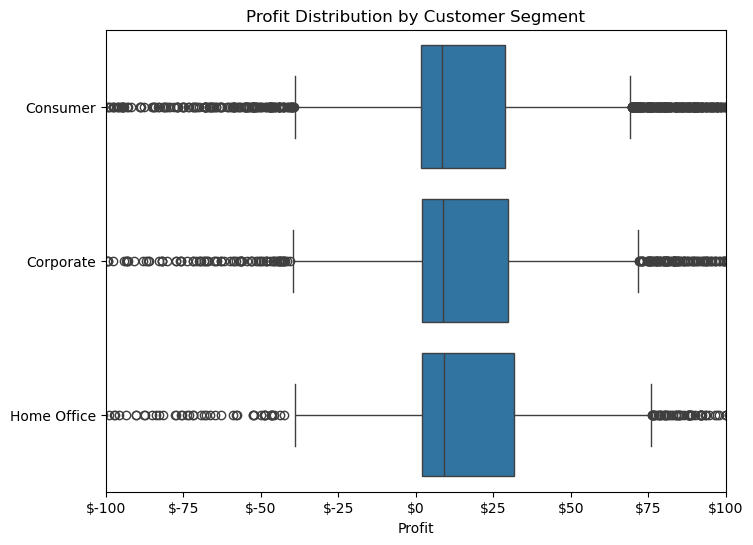

In [115]:
# this actually shows there doesnt seem to be much difference in the normal profit range but the outliers are very different in the different segments
plt.figure(figsize=(8,6))
sns.boxplot(x='Profit', y='Segment', data=df)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))

plt.title('Profit Distribution by Customer Segment')
plt.xlabel('Profit')
plt.ylabel('')
plt.xlim(-100,100)
plt.show()

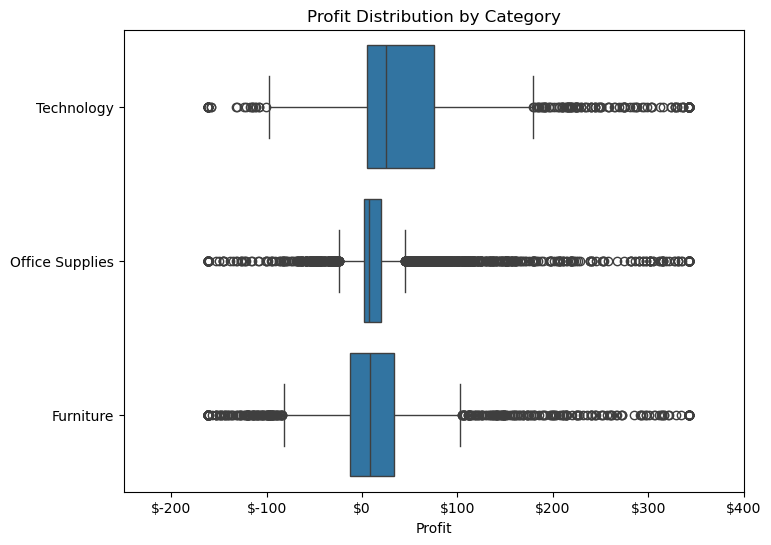

In [116]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Profit_Capped', y='Category', data=df)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))

plt.title('Profit Distribution by Category')
plt.xlabel('Profit')
plt.ylabel('')
plt.xlim(-250,400)
plt.show()

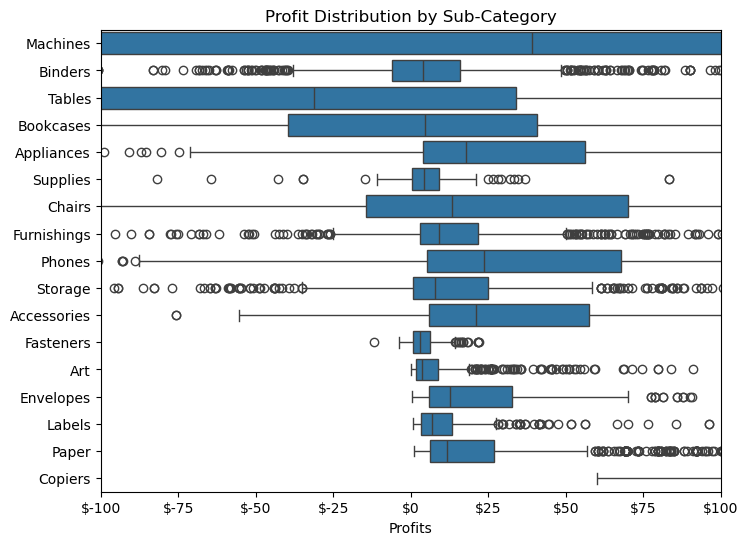

In [117]:
# very clearly need to investigate the profit data for machines further
plt.figure(figsize=(8,6))
sns.boxplot(x='Profit_Capped', y='Sub_Category', data=df)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))

plt.title('Profit Distribution by Sub-Category')
plt.xlabel('Profits')
plt.ylabel('')
plt.xlim(-100,100)
plt.show()

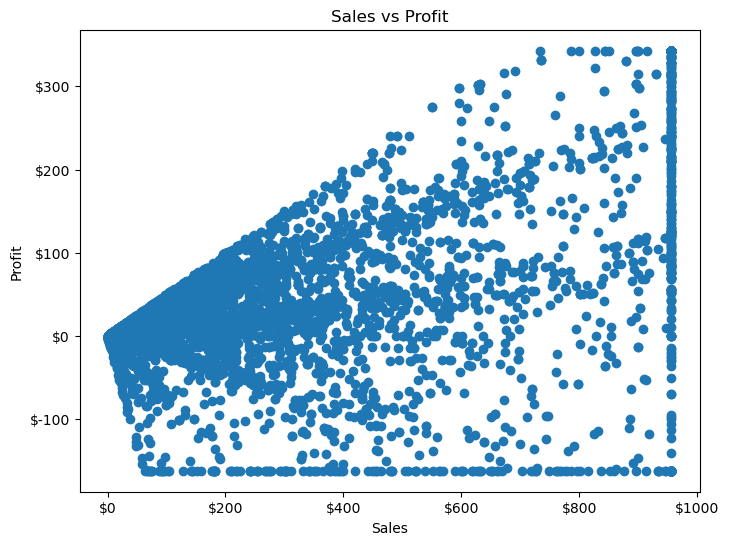

In [118]:
# using matplotlib to generate a scatter graph
plt.figure(figsize=(8,6))
plt.scatter(df['Sales_Capped'],df['Profit_Capped'])

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))

plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

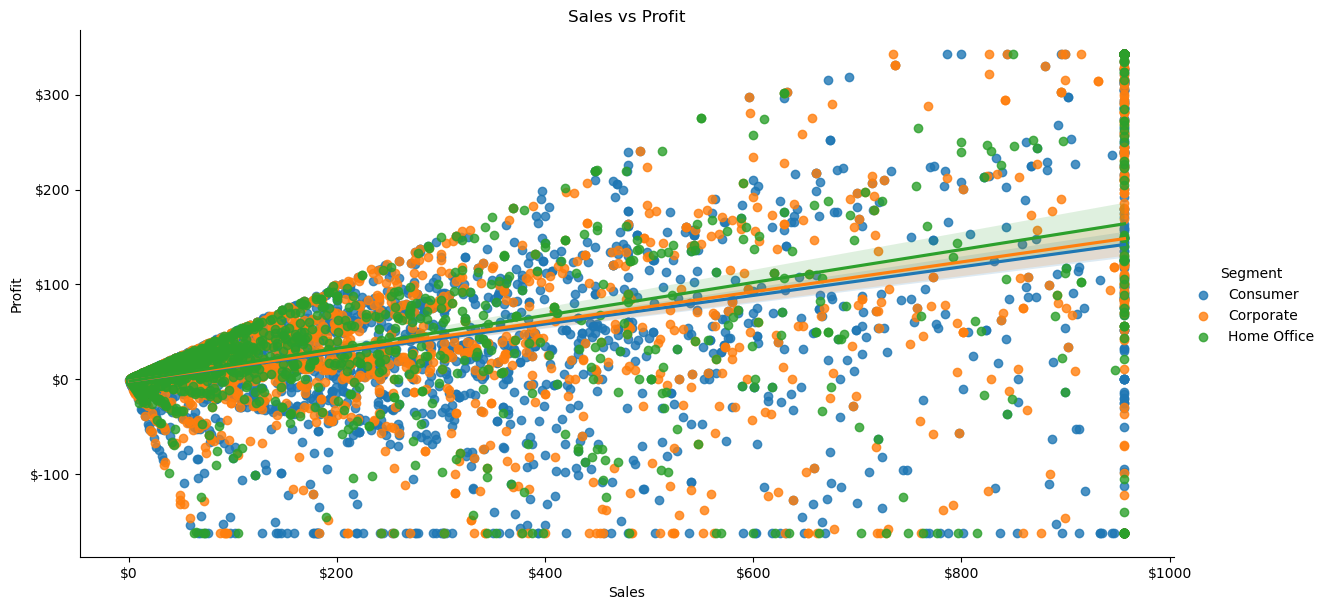

In [119]:
# using seaborn to generate the same scattergraph but with segment data included too

df_category_by_segment = df.dropna(subset=['Segment'])
sns.lmplot(x='Sales_Capped', y='Profit_Capped', data=df_category_by_segment, hue='Segment', height=6, aspect=2)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x)}'))
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

**References**

(1) Barousse L, Python for Data Analytics, https://youtu.be/wUSDVGivd-8?si=DHVv9H7SfiR9h42_

(2) Bala Priya C, KDNuggets, Data Science

(3) O'Sullivan Conor, DataCamp - Machine Learning

Helen Mason
202506495